In [65]:
import requests
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from scipy.stats import linregress
import datetime

In [2]:
from_dates = ["2019-10-1", "2019-11-1", "2019-12-1", "2020-1-1", "2020-2-1", "2020-3-1", "2020-4-1", "2020-5-1", "2020-6-1", "2020-7-1", "2020-8-1", "2020-9-1", "2020-10-1", "2020-11-1", "2020-12-1"]
to_dates = ["2019-10-31", "2019-11-30", "2019-12-31", "2020-1-31", "2020-2-29", "2020-3-31", "2020-4-30", "2020-5-31", "2020-6-30", "2020-7-31", "2020-8-31", "2020-9-30", "2020-10-31", "2020-11-30", "2020-12-31"]

In [3]:
from_date = []
to_date = []
incidents = []
parentIncidentType = []

for i, j in zip(from_dates, to_dates):
    from_date = i + "T00:00:00.000Z"
    from_dates.append([from_date])
    to_date = j + "T23:59:59.999Z"
    to_dates.append([to_date])
    payload = {}
    from_date = from_date
    to_date = to_date
    pageSize = "100000"
    payload["limit"] = pageSize
    payload["offset"] = 0
    payload["geoJson"] = {"type": "Polygon", "coordinates": [[[-94.32951884471989, 38.996363264325836], [-94.64880900585229, 38.996363264325836], [-94.64880900585229, 39.080896419140764], [-94.32951884471989, 39.080896419140764], [-94.32951884471989, 38.996363264325836]]]}
    payload["projection"]= "true"
    payload["propertyMap"] = {"toDate": to_date, "fromDate": from_date, "pageSize": pageSize, "parentIncidentTypeIds": "149,150,148,8,97,104,165,98,100,179,178,180,101,99,103,163,168,166,12,161,14,16,15", "zoomLevel": "12", "latitude": "39.03864248355025", "longitude": "-94.48916392528609", "days": "1,2,3,4,5,6,7", "startHour": "0", "endHour": "24", "timezone": "+00:00", "relativeDate": "custom", "agencyIds": "47860,1279,957,165,118,undefined,undefined"}
    url = "https://ce-portal-service.commandcentral.com/api/v1.0/public/incidents"
    headers = {'Content-Type': 'application/json'}
    payload  = json.dumps(payload)
    response = requests.request("POST", url, data=payload, headers=headers)
    print(i + " to " + j + ":")
    print(len(pd.DataFrame(response.json()['result']['list']['incidents'])))
    incident = len(pd.DataFrame(response.json()['result']['list']['incidents']))
    incidents.append([incident])
        
    try:
        print(pd.DataFrame(pd.DataFrame(response.json()['result']['list']['incidents'])['parentIncidentType'].value_counts()))
        incident_type = pd.DataFrame(pd.DataFrame(response.json()['result']['list']['incidents'])['parentIncidentType'].value_counts())
        parentIncidentType.append([incident_type])
        
    except (KeyError, TypeError):
        pass
        print()
    print("---------------------------------------")

2019-10-1 to 2019-10-31:
98
                     parentIncidentType
Theft                                58
Sexual Offense                       12
Theft from Vehicle                    9
Assault                               5
Breaking & Entering                   4
Quality of Life                       4
Theft of Vehicle                      3
Property Crime                        2
Assault                               1
---------------------------------------
2019-11-1 to 2019-11-30:
114
                     parentIncidentType
Theft                                68
Sexual Offense                       13
Theft from Vehicle                   12
Assault                               6
Theft of Vehicle                      4
Breaking & Entering                   4
Quality of Life                       4
Property Crime                        2
Assault                               1
---------------------------------------
2019-12-1 to 2019-12-31:
134
                     parentInciden

TypeError: can only concatenate list (not "str") to list

In [4]:
from_dates = from_dates[0:15]
to_dates = to_dates[0:15]
incidents = [val for incident in incidents for val in incident] 

In [5]:
crime_data = {
    "Start Date": from_dates,
    "End Date": to_dates,
    "Total Incidents": incidents 
}
crime_data = pd.DataFrame(crime_data)

In [6]:
crime_data['Start Date'] = pd.to_datetime(crime_data['Start Date'])
crime_data['End Date'] = pd.to_datetime(crime_data['End Date'])
crime_data

,Start Date,End Date,Total Incidents
0,2019-10-01,2019-10-31,98
1,2019-11-01,2019-11-30,114
2,2019-12-01,2019-12-31,134
3,2020-01-01,2020-01-31,0
4,2020-02-01,2020-02-29,0
5,2020-03-01,2020-03-31,0
6,2020-04-01,2020-04-30,0
7,2020-05-01,2020-05-31,0
8,2020-06-01,2020-06-30,0
9,2020-07-01,2020-07-31,0


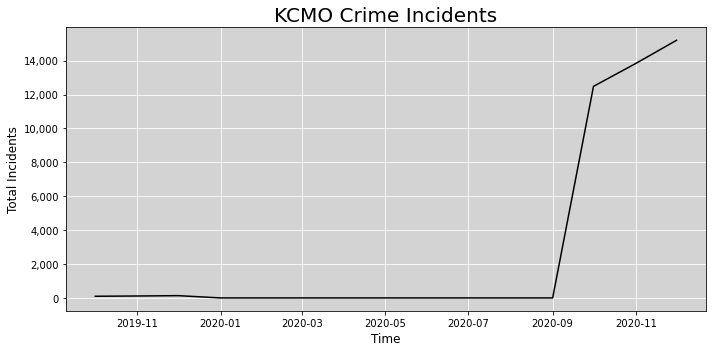

In [84]:
plt.figure(figsize = (10, 5))
plt.plot(crime_data["Start Date"], crime_data["Total Incidents"], color = "black")
ax = plt.gca()
ax.set_facecolor('lightgray')
plt.title("KCMO Crime Incidents", fontsize = 20)
plt.xlabel("Time", fontsize = 12)
plt.ylabel("Total Incidents", fontsize = 12)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.grid(True, color = "white")
plt.show()

In [47]:
october19 = parentIncidentType[0][0].reset_index()
november19 = parentIncidentType[1][0].reset_index()
december19 = parentIncidentType[2][0].reset_index()
october20 = parentIncidentType[3][0].reset_index()
november20 = parentIncidentType[4][0].reset_index()
december20 = parentIncidentType[5][0].reset_index()